### 任务：
1. 基于 iris 数据，建立KNN模型实现数据分类（n_neighbors=3）
2. 对数据进行标准化处理，选取一个维度可视化处理后的效果
3. 进行与原数据等维度PCA，查看各主成分的方差比例
4. 保留合适的主成分，可视化降维后的数据
5. 基于降维后数据建立KNN模型，与原数据表现进行对比

In [1]:
# 控制以允许JupyterNotebook多个输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
X.shape
y.shape

(150, 4)

(150,)

In [4]:
X_scale = StandardScaler().fit_transform(X)

In [5]:
pca = PCA(n_components=4)

In [6]:
X_pca = pca.fit_transform(X_scale)

In [7]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [8]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scale)
pca_2.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [9]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca_2, y, test_size=0.25, random_state=2021)
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(112, 2)

(112,)

(38, 2)

(38,)

In [10]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [11]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [12]:
knn_clf.score(X_test, y_test)

0.9210526315789473

In [13]:
# 绘制决策边界
def plot_decision_boundary(model, axis, epsilon=500):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], epsilon).reshape(-1, 1),
        np.linspace(axis[2], axis[3], epsilon).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

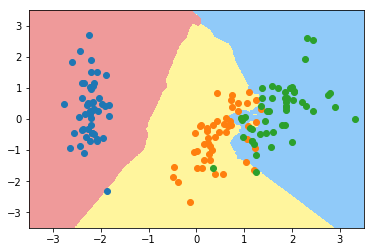

In [14]:
plot_decision_boundary(model=knn_clf, axis=[-3.5, 3.5, -3.5, 3.5], epsilon=500)
plt.scatter(X_pca_2[y==0, 0], X_pca_2[y==0, 1])
plt.scatter(X_pca_2[y==1, 0], X_pca_2[y==1, 1])
plt.scatter(X_pca_2[y==2, 0], X_pca_2[y==2, 1])
plt.show()